# Asset Pre-Assessment: S&P 500, Case Study for Large Cap US Stock

In this project, we assess hsitroical data for selecting statistical parameters
and general market trends.
It is our contention that, in the long-term and typically the mid-term as well, 
the US stock market increases in value at a rate significantly higher than inflation 
and typically higher than most other investment opportunities.
Furthermore, investing on longer times-scales and over several assets it is more 
likley to benifit from classical statistical approches used to learn
from past data in order to make informed choices (more data can equal better statistics).
This is why Condor suggests a diversified, mid- to long-hold investment strategy
for the typical investor.
We, somewhat arbitrarily, consider 5 and 10+ years to be  
be mid and long time-scales for investment.
Although some stratagies and insights may be relavant at scales < 5 years.

for typical retail investors, however, it is not possible to hold 
a large enough portfolio to sufficiently cover the market, 
a subsection like Large Cap US Stocks
or even an individual sector.
While passive ETFs (e.g. the SPDR S&P 500 ETF trust, SPY) 
do provide a decent mechanism to over come issues of wide market coverage 
at low buy-in amounts,
investors often have interest in holding specific stocks for a variety of reasons.
To facilitate this, systematic methods have been developed to 
assist in determining the proper distribution, or allocation,
of investment funds across multiple risky assets. 
For example, Modern Portfolio Theory, which uses mean-variance portfolio optimisation.
Condor Funds expects to apply variations on such methods to empower
clients without a strong technical background with tools to rationally balance their portfolio investments.

These methods require the estimate of asset metrics 
For example, expected asset return and volatility (risk).
Importantly, this in-turn requires the choice of statistical meta parameters 
(e.g. historical data smapiling frequency and period).
This work allows us to propose reasonable parameters for 
the overall US Large Cap Stock Market.
These parameters will be used as a 'rule-of-thumb' for 
optimising portfolios with individual US stock assets.
We do note that given sufficient historical data, 
such meta parameters could be calculated at the individual asset level and
that the following analysis can be used for any risky asset with 
sufficient historical data.

In addition, when holding a long-term portfolio there are clearly periods in-which 
the market deviates from a consistent, pre-anticipated trend.
This can lead to sharp, unexpected increases or losses in returns.
Some of these events can extend over multiple months or even years 
and cause anxiety in investors. 
Ultimately, this can result in counter-productive portfolio management decisions,
such as selling stocks as overall market prices trend downwards
despite historical observations that markets recover over sufficient time periods.
To overcome concerns, we hope to quantify conditions around market deviations.
We believe that investors can act more confidently during unusual deviation events 
if we can inform and prepare them for such inevitabilities prior to investment.
Furthermore, specific properties of these events can inform 
proper portfolio management strategies.
For example, how often to fully reassess investment allocations vs 
simply rebalancing a portfolio to match predetermined allocations.

As always, we stress that this is a statistical analysis based only on past data.
Statistical trends and expectations are more likley to be realized 
in future results given more data and oppertunity.
In this context more oppertunity typically means 'over the long-term'. 
However, past performace never gurantees future results.
There are always several complex factors at play.
For example, while very unlikley, it is always *possible* that 
the market could change in such a fundemental way that all 
past data could be rendered uninformative.
All investors should stay up-to-date on their investment positions
and be open to other sources of information.
This analysis, like all others,
has a limited source of input data and a narrow view point on goals.
Consideration of additional market factors could improve real-world outcomes.
This consideration becomes increasingly important at shorter
time-scales of investment.

This workflow uses historical data to assess simple trend fitting, 
autocorrelation and robust statistics for estimating risk and return metrics.
For robust statistics, we use the median to estimate a parameters expected value
and the Median Absolute Deviation (MAD) with normal corrrection 
as a measure of dispersion of the parameter around the expected value.
Dispersion is a more general term than variance but describes the same concept.
We note that our choice for dispersion metric would approch 
the standard deviation for normally distributed data as the sample
size approches inf.
It is well documented that the assumption of a normal 
distribution is a major cause for concern in the original 
formulation of MPT's mean-variance optimization.
As this poorly describes stock returns.
There are sevral far more complex solutions for the 
applicaiton of robust statistics on portfolio opptimization in the liturature.
However, we previously found (Project 202410) that this simple 
median and MAD strategy have marit and can out perform a normal distribution assumption.

The goal here is to identify:
* sample freq;
* sample period;
* deviation event lengths (particularly for re allocation timeframes); and
* expected returns as a function of hold time.

### *Notice*
*We stress that none of our Jupyter Notebook projects are to be considered final and of publication quality unless otherwise stated. We also provide no warranty or guarantee of any kind. These projects are meant for testing code and learning concepts in a transparent, and often evolving manner. If new methodologies, stratagies or fundamental understandings are applied in the future, they will most likely be explored in future projects. For transparency and documentation, old projects will not be removed but instead will be deprecated (and clearly marked as such). Look for updates on GitHub https://github.com/Rtasseff/condor_test/tree/main/project*

## Setup

In [1]:
# Paths

# Analytics dir path *USER SET*
analyticsDir = '/Users/rtasseff/projects/condor_test/analytics'
# Data dir path *USER SET*
dataDir = '/Users/rtasseff/projects/tmp'
import sys
# adding analytics to the system path
sys.path.insert(0, '/Users/rtasseff/projects/condor_test/analytics')

from data_mining import load
from functions import genStats
from functions import genFin
from functions import assetPreassess as apa
from functions import utils


import numpy as np
import matplotlib.pyplot as plt


## I. SP500 Data 
We are using 50 years of S&P 500 history (1974-2024), 
obtained from Yahoo Finance under the symbol ^GSPC.

### i. Load Price

Show pricing data by date and plot.
Here we are using the adjusted closing price as our main daily indicator.

<class 'pandas.core.frame.DataFrame'>
Index: 12608 entries, 12607 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         12608 non-null  datetime64[ns]
 1   Open         12608 non-null  float64       
 2   High         12608 non-null  float64       
 3   Low          12608 non-null  float64       
 4   Close*       12608 non-null  float64       
 5   Adj Close**  12608 non-null  float64       
 6   Volume       12608 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 788.0 KB


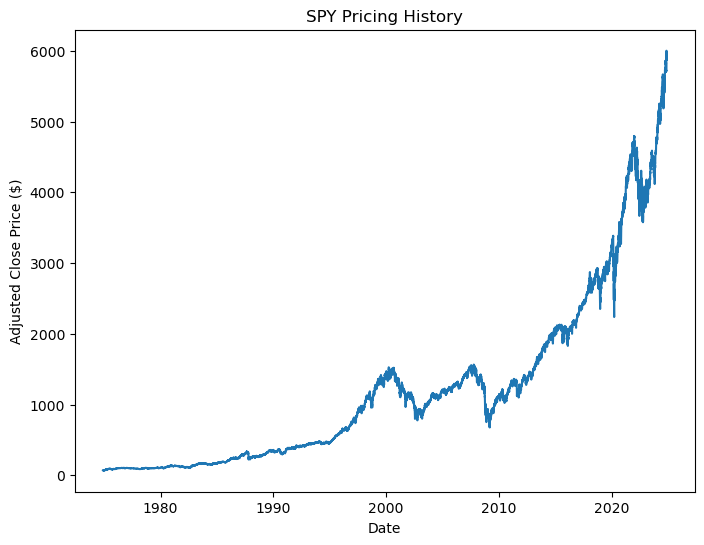


----------
Time Span: 600 months
Number of points sampled: 12608


In [2]:


# get data

#dates,prices = load.assetHist_CSV(dataDir+'/spy_MAX.tab', sep='\t',assetN='SPY')
dates,prices = load.assetHist_CSV(dataDir+'/sp500_GSPC_50y.tab', sep='\t',assetN='SPY')

#dates = dates[2500:]
#prices = prices[2500:]

print('')
print('----------')
print('Time Span: '+str(np.datetime64(dates[-1], 'M')-np.datetime64(dates[0], 'M')))
print('Number of points sampled: '+str(len(dates)))



### ii. Caculate Returns
In the future, we will be considering many estimates over monthly relative returns.
We feel this may actually be a more important feature, vs price, 
to look at for exploring certain detials.  For example, 
in Projects 202407 and 20409, we found long term memory and high noise 
(as determined from the autocorrelation function) in the price. 
Therefore we chose to consider the returns for determining the samplining frequence.

Here we defined a month to be 21 consecutive adjusted closing day prices. 
We are considering set 30 day period for a month. 
Stock is traded and recorded only when the market is open, 
so our time series only contains weekdays.
We are removing 2 weekends days per week. 
A 30 day month, given 4.25 weeks each month, yields 8.5 weekend days.
We removed 9 days to account for a handful of holidays.
Importantly, this is consistant with the number of data points over a
spepcific range of time as confirmed in past studies.

As a matter of practice, we are considering relative returns.
 


[-0.01977768 -0.00806452 -0.01458027 ...  0.02925407  0.01826282
  0.00499018]
['1974-12-18T00:00:00.000000000' '1974-12-19T00:00:00.000000000'
 '1974-12-20T00:00:00.000000000' ... '2024-11-13T00:00:00.000000000'
 '2024-11-14T00:00:00.000000000' '2024-11-15T00:00:00.000000000']


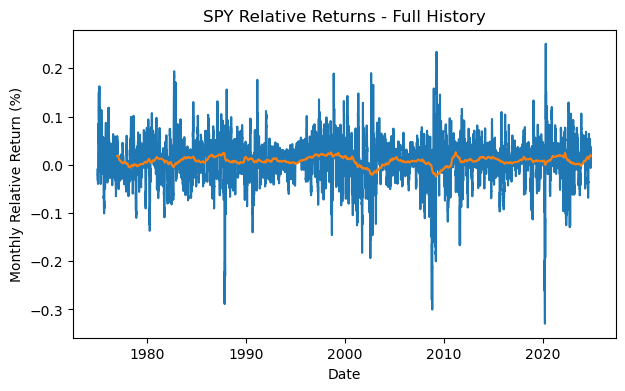

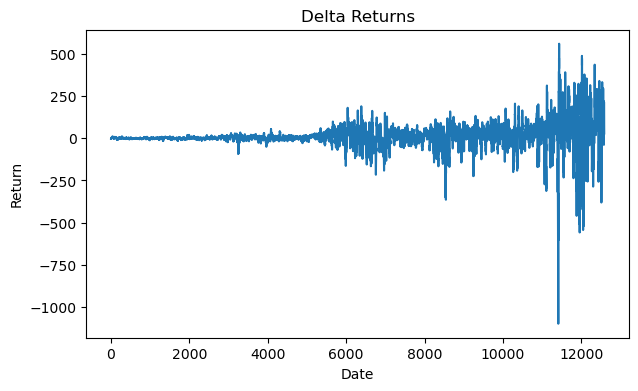

In [3]:
# conversion factor for months to consecutive points *USER SET*
month2days = 21

returns = genFin.returns(prices,period=month2days)
inds = np.arange(0,len(returns))+month2days
dates_returns = dates[inds]

# Show for sanity check
print(returns)
print(dates_returns)

# moving averages for fun
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

returnsMA = moving_average(returns, 500)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_returns, returns)
plt.plot(dates_returns[499:], returnsMA)

plt.xlabel('Date')
plt.ylabel('Monthly Relative Return (%)')
plt.title('SPY Relative Returns - Full History')
plt.show()

#Plot the non relative data for fun
plt.figure(figsize=(7, 4))
plt.plot(np.arange(0,len(returns)), genFin.returns(prices,period=month2days,metric='Delta'))
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Delta Returns')
plt.show()


General we found the relative returns to show now clearly visible trend.
There are three clear low points in the curve.
These points corispond to 1987's Black Monday, 2008 housing crisis and the COVID pandemic.  


Alternativly the absolute returns clearly show a qualitative explosion of variability 
around the 2000 and 2020. 
This corrisponds to the 2000 Dot Com Bubble and the COVID pandemic, respectivly.
In both cases, much of this variability seems to persist.

The lack of clear viisible signals in the relative returns 
suggests that these features are muted by the overall value of the index at the time.
The deviation in return, relative to the current return does not 
show such significant features.
Relativly speaking, these deviations are not as big as they seem when compared to 
older (pre 2000) returns.
It is important to note that the 
1999 repeal of the glass-steagall act lead to an explosion of money into the market.
Retail banks that were previously limited to low risk investments 
were suddenly able to invest in much riskier assets.
The bank where you would go to deposit your money 
used to be limited to 'safe' investments with that money.
After 1999, however, they were able to use your money in a mor risky fashion.
This seems to have lead to an increase in returns, 
but a corrisponding increase in volitlity.
In fact, looking at the orange moving average of the curve, 
you can see the bubble foarm and then evaporate around 2000.
One might consider the Dot Com bubble more of a glass-steagall bubble.



## II. Sampling Frequency 

For any statistical analysis, we have to determine how much time will pass 
between t<sub>i</sub> and <sub>i+1</sub> in our data set. 
In our experience, this is often arbitrarily determined, 
but here we considered a more formal statistical approach. 
We want to maximize the number of sampling points while minimizing their dependence since a proper statistical analysis would require statistically independent samples.
We would like to select a sampling rate that minimizes the statistical dependance between data points that is driven simply by proximity in time, 
but keep as many data points as possible to boost statistical power. 
In a perfect senario this would be done by considering the elapsed time for the Auto-Correlation Function (ACF) to drop and then remain at zero. 
Of course, in any real-world data there is noise that keeps this from happening. 
In complex non-linear systems like the stock market 
there is also the high possibility of long-term memory effects as observed 
when the ACF does not approach zero or deviates from it after a period of time. 
We arbitrary chose a cutoff of +/-0.05 around the zero to be considered 'reasonably' near zero.

Previously (Project 202409), we formulated a set of rules 
to systematically select a sampling frequency from the ACF. 
First, we chose to require that the zero was within the 95% CI of the ACF value. 
This is a necessary but not a sufficient condition for being near zero. 
We also chose to require the ACF value to be within the cutoff range 
defined above as +/- 0.05. 
We went further to require the above to be true for one month, 
defined above as 21 days (i.e. 21 consecutive data points in the time course). 
Since the returns are 21 days, it stands to reason we would like our samples to be spaced such that they are nearly uncorrelated over 21 days.

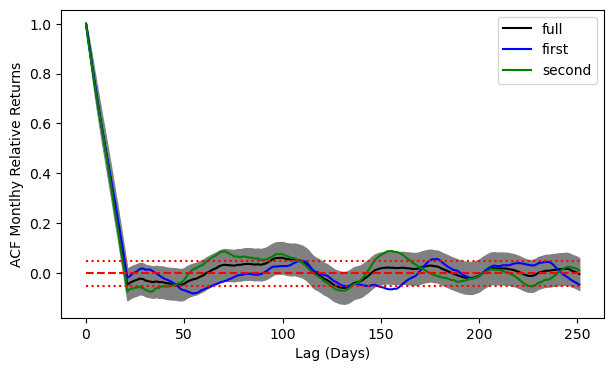

Return ACF
[ 1.          0.94166359  0.88676095  0.83358025  0.78069953  0.72893219
  0.67904847  0.63177374  0.58326068  0.53865823  0.49239324  0.44441437
  0.39872538  0.35202265  0.30238097  0.25340275  0.20776186  0.15694526
  0.1056676   0.05661669  0.00651326 -0.0462659  -0.0405982  -0.03581985
 -0.03244152 -0.02932045 -0.02689641 -0.02232655 -0.02273147 -0.02341434
 -0.0287183  -0.03151023 -0.03262566 -0.03476668 -0.03619471 -0.03440371
 -0.03352399 -0.03628145 -0.03600281 -0.03606108 -0.03911434 -0.04043612
 -0.04127584 -0.04228459 -0.04306818 -0.04303171 -0.04446052 -0.04517865
 -0.0468242  -0.04580741 -0.04303009 -0.03686989 -0.03279238 -0.02913798
 -0.02642495 -0.02400308 -0.02265104 -0.01874613 -0.01439631 -0.01126593]
Return ACF 95% Conf
[[ 1.          0.92419383  0.85766732  0.7971603   0.73886004  0.68286086
   0.62958242  0.57954019  0.52874489  0.48227011  0.43445599  0.38521375
   0.33851519  0.29101194  0.24075349  0.19132412  0.14536834  0.09434096
   0.04294333 -0

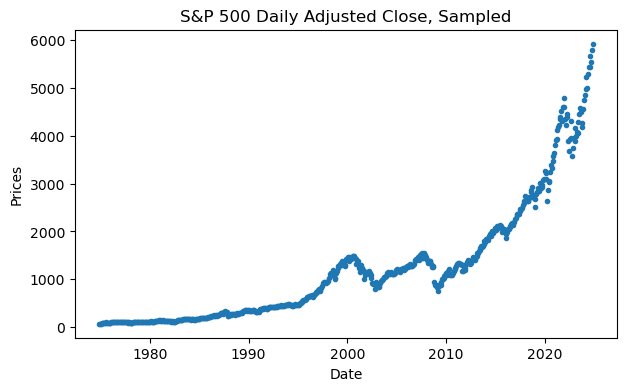

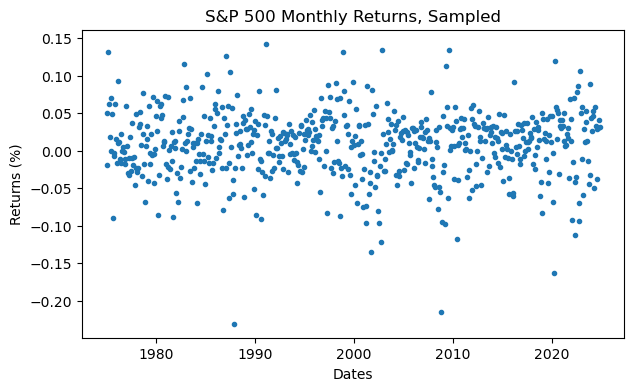

In [4]:
# +/- cutoff for 'near zero' ACF values *USER SET*
acfCutoff = 0.05

# Calc autocorr
acf_return, lag_return, acfConf_return = genStats.acf(returns,fracLag=0.02)
m = int(len(returns)/2)
acf_return_st, lag_return_st, tmp = genStats.acf(returns[:m],fracLag=0.04)
acf_return_nd, lag_return_nd, tmp = genStats.acf(returns[m:],fracLag=0.04)




# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(lag_return, acf_return,color='black',label='full')
plt.plot(lag_return_st, acf_return_st,color='blue',label='first')
plt.plot(lag_return_nd, acf_return_nd,color='green',label='second')
plt.legend()

plt.plot(lag_return, lag_return*0 ,'r--') 
plt.plot(lag_return, lag_return*0 + acfCutoff,'r:') 
plt.plot(lag_return, lag_return*0 - acfCutoff,'r:') 
plt.fill_between(lag_return,acfConf_return[:,0],acfConf_return[:,1],color='gray')
plt.xlabel('Lag (Days)')
plt.ylabel('ACF Montlhy Relative Returns')
#plt.title('')
plt.show()


print('Return ACF')
print(acf_return[:60])
print('Return ACF 95% Conf')
print(acfConf_return[:60].T)


sampFreq = apa.find_samp_freq(returns, cutoff=acfCutoff, period=month2days, fracLag=0.02)
sampFreq_st = apa.find_samp_freq(returns[:m], cutoff=acfCutoff, period=month2days, fracLag=0.04)
sampFreq_nd = apa.find_samp_freq(returns[m:], cutoff=acfCutoff, period=month2days, fracLag=0.04)


print('Samp Freq')
print('- Full Data Set '+str(sampFreq))
print('- First Half '+str(sampFreq_st))
print('- Second Half '+str(sampFreq_nd))

# Parse out the proper sample data
n = len(prices)
inds = np.arange(0,n,sampFreq)
prices_samp = prices[inds]
dates_samp = dates[inds]


n = len(returns)
inds = np.arange(0,n,sampFreq)
returns_samp = returns[inds]
dates_returns_samp = dates_returns[inds]

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp,prices_samp,'.')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('S&P 500 Daily Adjusted Close, Sampled')
plt.show()

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_returns_samp,returns_samp,'.')
plt.xlabel('Dates')
plt.ylabel('Returns (%)')
plt.title('S&P 500 Monthly Returns, Sampled')
plt.show()



We found a sampling frequency as low as 20 days was sufficent to 
meet the pre-determined selection criterion.
Classical modeling of returns often considered a 
constant return with a random noise component.
If this holds then it is expected for returns to have a 
raipidly dropping auto correlation function, as obsered here.
Our result of 20 days was probably only limited by the 
fact we defined our returns as 21 day intervals.

As with our early analyses, there was some long-term
memory effect ocilating btween positive and negative correlations 
(often attributed to market forces that 'correct' for large price swings over time).
However, these ocilations were within the bounds of the criteria for this study.
We did note that using only the most recent 25 years of data
a higher samping interval of 165 days was identified.
This might suggest stronger correlation in more recent asset 
returns as compared to those of 25 years and older.
That being said, the average ACF values for the firist 
and second set of the data both occilate within the confidence intrval
of the full data set.
We also found that a data interval similar to the one used in 
the inital assessment of an S&P beta 1 ETF, SPY (Project 202410, 
produced a comparable intrval of ~40 days (data not shown). 
Therefore, it is clear that this sample frequency is dependant 
on the specific selection criterion, which is somewhat arbitrary, 
and this difference between time periods may be related to noise 
and mannually selected cutoffs as opposed to fundemental market changes.
In the end, there is always some arbitrary nature to choosing such meta parameters.
Here we have at least endevoured to apply a more systimatic approch 
that can provide better understanding and support for the chosen values.



## III. Asset Deviations
Here we identified deviations in the price that were 'meaningfully' different 
from what one might expect given the 'simple' underlying trend of the data.
To do this we need to identify an underlying trend, define what is 
'meaningfully' different and identify sequental occurances of this trend.

### i. Priceing Trend 
We will be considering several 'simple' models for an underlying price trend.

Models:
* Polynomials 1-8th order
* exp function
* logrithmic function

All models were fit by transforming variables and then 
using the statsmodel library ordinary least squares solver.
In projects 202407, 202409 and 202410, we chose to use the maximum 
adjusted R-Squared value for the model selection criterion.
We applied the same here. 

Note that we used the modified, smaller samplied data set
for determining quantaties of a statistical nature.

#### Side Note:

As discussed in Project 202410,
we found a signifcant impact of x scaling on fitting early time points.
Therefore we applied multiple scaling parameters as before and 
manually chose one.
More work needs to be done to systimatically automate this in the future.
However, it should be noted that it would not make much or any 
change to selection of sample freq and period, which are the most important findings here.
It has the largest impact on deviation, 
and since we report robust statistics to describe the typical deviation event,
a subset of distorted early values would have little impact.




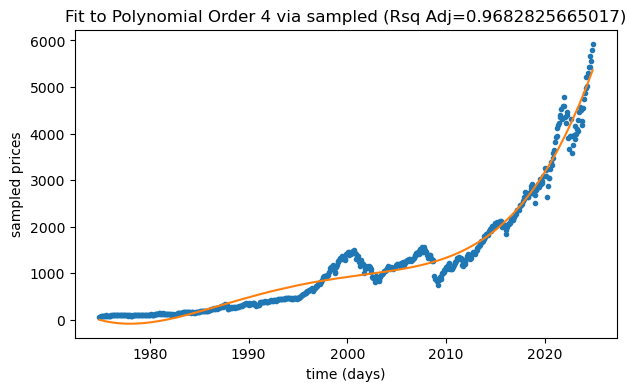

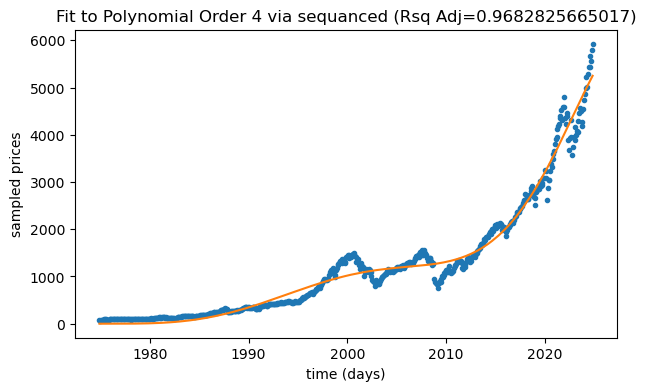

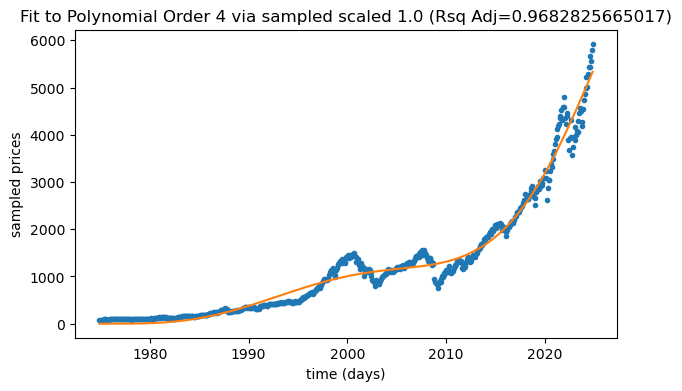

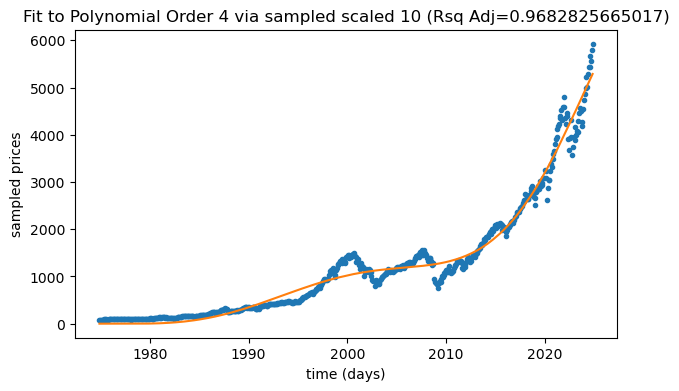

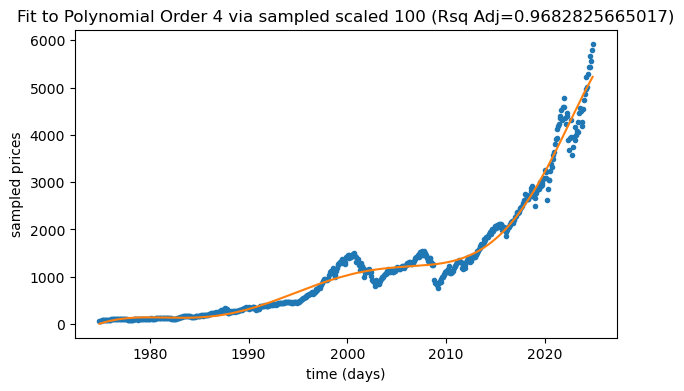

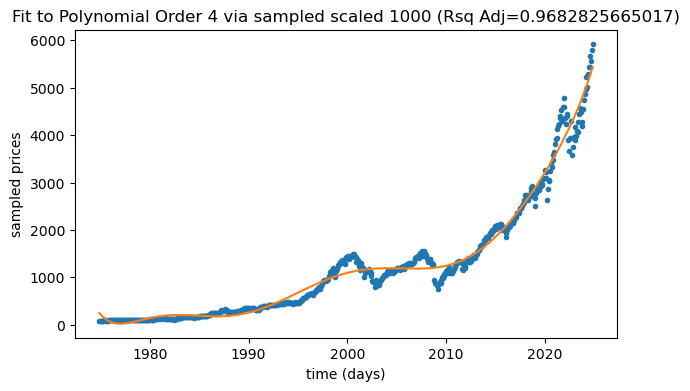

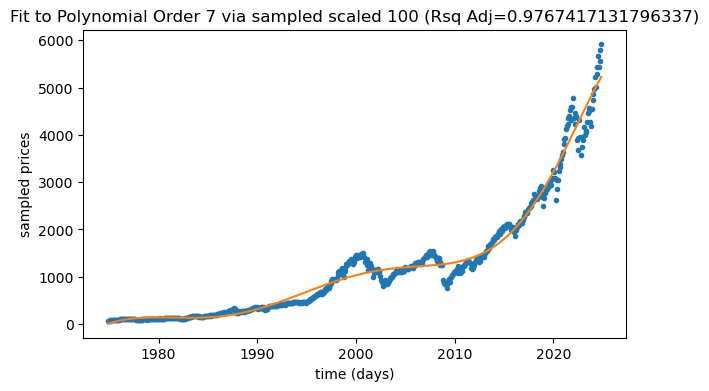

In [5]:


### fit trend line
maxPolyOrder = 8
# need consecutive numbers, not dates, values not important, evenly spaced
x = np.arange(0,len(dates),1)
n = len(dates)
inds = np.arange(0,n,sampFreq)
x_samp = x[inds]


rsqAdj, name, model, prices_sampHat = genStats.fit_simp_model(x_samp, prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled (Rsq Adj='+str(rsqAdj)+')')
plt.show()


_x_samp = np.arange(0,len(dates_samp),1)
_rsqAdj, _name, _model, _prices_sampHat = genStats.fit_simp_model(_x_samp/1.0, prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,_prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sequanced (Rsq Adj='+str(rsqAdj)+')')
plt.show()


__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/1., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 1.0 (Rsq Adj='+str(rsqAdj)+')')
plt.show()


__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/10., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 10 (Rsq Adj='+str(rsqAdj)+')')
plt.show()

__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/100., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 100 (Rsq Adj='+str(rsqAdj)+')')
plt.show()

__rsqAdj, __name, __model, __prices_sampHat = genStats.fit_simp_model(x_samp/1000., prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,__prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 1000 (Rsq Adj='+str(rsqAdj)+')')
plt.show()

# in thory we can arbitrarily set it, but due to the numerics of 
# the OLS solver, it seems like this scaling prevents wierdness
# in how the early dates are fit (some weighting issue)
xScaleFact = 100
x_samp = x_samp/xScaleFact
# for future sake need to keep these treated the same
x4Fit = x/xScaleFact

rsqAdj, name, model, prices_sampHat = genStats.fit_simp_model(x_samp, prices_samp, maxPolyOrder)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, prices_samp,'.',dates_samp,prices_sampHat,'-')
plt.xlabel('time (days)')
plt.ylabel('sampled prices')
plt.title('Fit to '+name+' via sampled scaled 100 (Rsq Adj='+str(rsqAdj)+')')
plt.show()


We found an excelent fit, adjusted r-squared of 0.98, 
with a poly order 7 and x values scaled by 100.

### ii. Define Deviations
We considered the price to be based on both a 'drift' and a 'noise' term.
In a perfect world, the drift would be defined by the trend and 
the noise by a uniformly distributed independnat random variable.
However (and as expected), there are clear deviations away from and 
back to the trend line over meaningfully long periods.
These are also easy to link to particular market events known to effect
the overall US economy.
In Project 202410, we chose to purse these further as abnormal deviations events.
We did the same here by considering the dispersion around the trend line
and the prices that are abnormally high or low.
Specifcally, we considered the possibility +/- 
the Median Absolute Deviation (MAD; corrected to match stdev under normality)
as a definition for abnormal price behaviour.
In Project 202410 we considered other options but dcided to move forward with MAD.



Dispersions
----------------
method --- value
----------------
MAD (trunc) --- 0.18672038456291365
MAD (full) ---- 0.18877273310824227


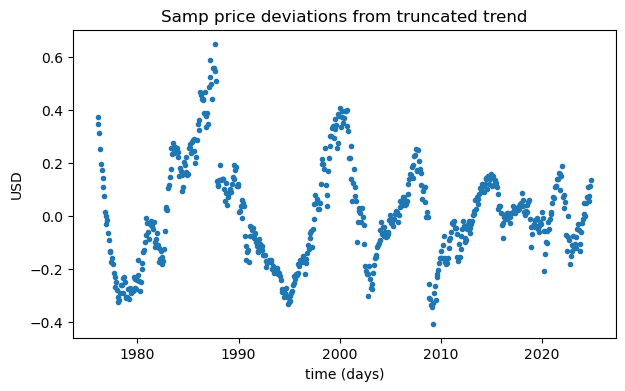

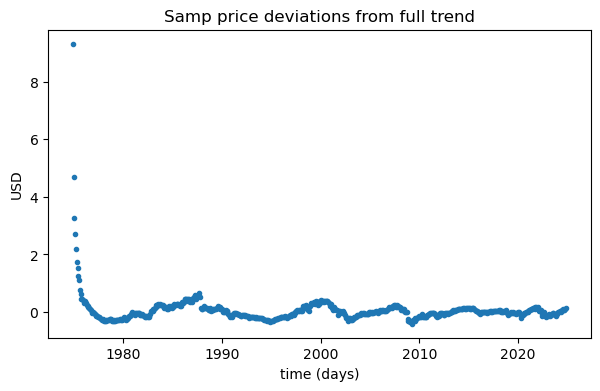

In [6]:
# because of the poor tail fit at early times, 
# we are going to remove a few early points
# This is a bit of a hack but the deviations are not 
# critical to optimization analysis at the heart of the Condor Workflow
cutoff = 15

# consider deviations
method = 'MAD'

# get deviations
devs = genFin.dev(prices_samp[cutoff:],prices_sampHat[cutoff:])
devsFull = genFin.dev(prices_samp,prices_sampHat)

print('Dispersions')
print('----------------')
print('method --- value')
print('----------------')


sigma = genStats.disper(devs,method=method)
print('MAD (trunc) --- '+str(sigma))
sigmaFull = genStats.disper(devsFull,method=method)
print('MAD (full) ---- '+str(sigmaFull))

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp[cutoff:], devs,'.')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.title('Samp price deviations from truncated trend')
plt.show()

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(dates_samp, devsFull,'.')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.title('Samp price deviations from full trend')
plt.show()


We found the typical expected price deviation to be +/- 0.1867.
We ran this on a slightly truncated data set, removing the first 15 data points.
This was done to ignore the poor fiting of early data points.
A better, more systimatic weighting scheme for the fits (III.i) would be prefered,
but since the this only goes to deviations, 
which are primarily of qualitative interest, 
we have chosen not to pursue further fit refinement at this time.
Furthermore, the use of rubust statistics would mitigate the effects 
of this poor early fit outliers as demonstrated by nearly identical MAD 
values when calculating on both the truncated and full data sets (0.1867 vs 0.1888).
The truncations in more helpful from a visual perspective,
as seen in the graphs above.

### iii. Identify Deviation Events
We defined a deviation event as a sequence of consecutive price
deviations that stay above the abnormal deviation threshold.
This period, in total, would be one deviation event of some period length.

Note: unlike the statistical tests where we used the sampled data, 
here we considered different resolutiobs starting with the full data set.
This is because we do not need the data set to be independently distributed.
In fact, we are in some sense suggesting that there is a dependance 
between the prices in a given event period.
This is somewhat related to the observations of long-term price memory 
in other projects and why we had to base sampiling on the return.

-------------------------------
--Deviations Root From Months--
-------------------------------


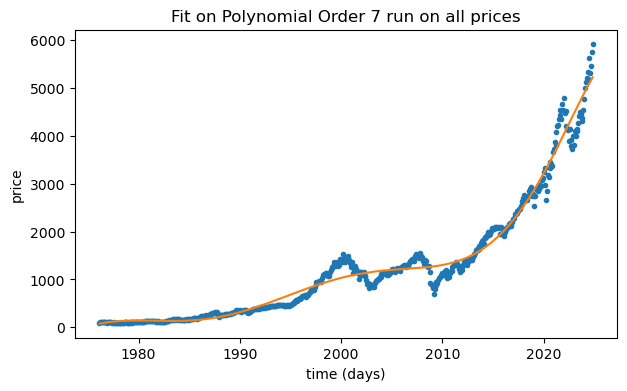

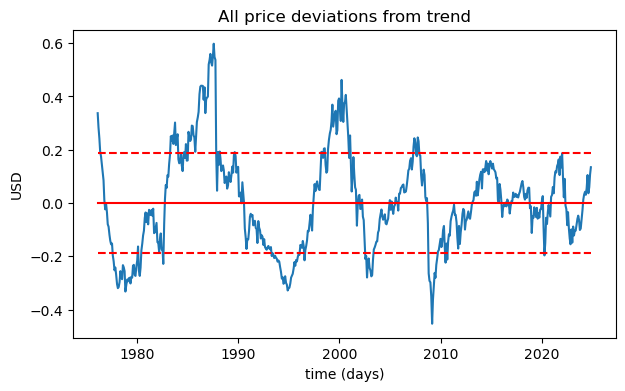

Threshold: 0.18672038456291365
Method: MAD
Number of Events: 24
Expected Event Length (M): 2.857142857142857
Abnormal Event Length (M): 5.010446079258136
Rare Event Length (M): 9.317052523488695
Crazy Event Length (M): 13.623658967719251
Event Lengths:
[  29.   29.   30.   30.   30.   30.   30.   31.   32.   32.   32.   59.
   61.   62.   91.   91.  120.  273.  304.  336.  761.  910. 1001. 1033.]
Total Time:
5437.0


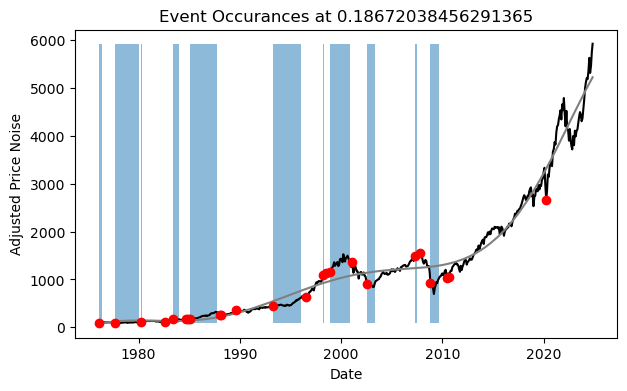

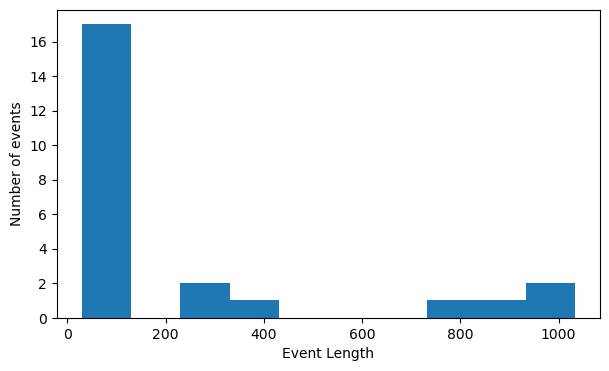

In [8]:
# first we need the trend for the whole data set

# get values
pricesHat = model.predict(genStats.x2X(x4Fit,name))


print('-------------------------------')
print('--Deviations Root From Months--')
print('-------------------------------')


# get the disiered subset
n=len(dates)
inds=np.arange(0,n,month2days)
x=dates[inds[cutoff:]]
y=prices[inds[cutoff:]]
yHat=pricesHat[inds[cutoff:]]

thresh = sigma

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(x, y,'.',x,yHat,'-')
plt.xlabel('time (days)')
plt.ylabel('price')
plt.title('Fit on '+name+' run on all prices')
plt.show()

devs = genFin.dev(y,yHat)
absDevs = np.abs(devs)

# Plot the data for sanity check
plt.figure(figsize=(7, 4))
plt.plot(x, devs)
plt.plot(x, devs*0,'-r')
plt.plot(x, devs*0+thresh,'--r')
plt.plot(x, devs*0-thresh,'--r')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.title('All price deviations from trend')
plt.show()
    

    
# flag deviations for this metric
eventInd, eventTime, eventLength = apa.flag_dev_event(x,y,yHat,thresh)

# need floats not timedelays for some processing
eventDays=utils.ns2days(eventLength)
    
print('Threshold: '+str(thresh))
print('Method: '+method)
print('Number of Events: '+str(len(eventTime)))
eventExp = np.median(eventDays)/month2days
print('Expected Event Length (M): '+str(eventExp))
eventDisper = genStats.disper(eventDays,method)/month2days
print('Abnormal Event Length (M): '+str(eventExp+eventDisper))
print('Rare Event Length (M): '+str(eventExp+3*eventDisper))
print('Crazy Event Length (M): '+str(eventExp+5*eventDisper))
print('Event Lengths:')
print(np.sort(eventDays))
print('Total Time:')
print(np.sum(eventDays))
inds = np.array(eventInd)
    
# Plot the data
plt.figure(figsize=(7, 4))
plt.plot(x, y,color='black')
plt.plot(x, yHat,color='gray')
plt.plot(x[eventInd],y[eventInd],'or')

plt.fill_between(x, min(y), max(y), where=(absDevs > thresh), alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Adjusted Price Noise')
plt.title('Event Occurances at ' + str(thresh))
plt.show()

    
plt.figure(figsize=(7, 4))
plt.hist(eventDays)
plt.xlabel('Event Length')
plt.ylabel('Number of events')
plt.title('')
plt.show()






We found the expected time for an abnormal event to be about three months.
Unusual event lenthgs are between 5 and 9 months (1 and 3 deivations)
with extreamlly rare events being longer than 13 months (5 deviations).
We use this data to support the suggestion to long- and mid-term investors that: 
* abnormal price deviations, as the name suggests, are not common but are to be expected;
* these events are expected to last about 3-5 months;
* regular reallocation via standard optimization should be done every 6 months (or less);
* early exiting or entering large cap stocks should not be driven only by recent price trends less than 5 months;
* some investors with shorter time horizans may want to consider re-allocation based on other market factors for events lasting longer than 9 months;
* outside of other major factors, true long-term/ buy-and-hold investors should consider *not* making major changes based on events shorter than 9 months;  
* all investors are encuraged to consider re-allocation based on other market factors for events lasting longer than 9 months;
* however, don't excessivly run into or out of stocks simply because they have been on a 9 month up or down streak as there are several historical examples of market corrections even at this time-scale (what goes up must come down, sort of); and  
* events lasting longer than 13 months are of extream concern and may indicate fundemental changes.

Using a more broad perspective, 
the first thing of note was the lack of deviation events at later times
(save a single blip during the COVID crash in 2020).
As expected from above, we had similar results on the full data set (not shown).
This suggests it was not an artifact of the fit weighting (III.i).
Furthermore, project 202410 demonstrated similar behaviour 
using an S&P 500 ETF where the main difference is simply the data start date, 1993.
Using that data we did have two interesting events not detected here.
This was the post COVID revovery, deviating upward over several months,
and a following abrupt drop in 2022.
While we observed these deviations in the graph, 
they are slightly below the MAD cutoff here.
We did not take this to be an artifact.
Despite all the news attention given to the recovery and the 'crash' during 2022,
We can see that from a relative perspective, there were far larger 
deviation events in the late 1970's and 1980's.
These events were not captured in Project 202410 because
the asset considered did not exist at that time.
When a longer history of the market is considered, 
and when using a relative percpective, 
these recent events are not abnormal.
Throughout this project we are finding that the market deviations 
post 2000 are significantly higher, but so too is the market value.
A question arises, does the older market data provide 
insight on what might happen or has the market fundementally changed, 
making the older data irrelavant?
Further investiagation is warented, but is out side the scope of this analysis, 
and is likley impossible without additional data sources and perspectives. 

One interesting feature that is captured here and in Project 202410,
is the so called 'Dot Com' bubble.
Here, the crash does registar as an abnormal deviation event, 
but the build up is a far more signficant event
in terms of both magnatude and duration.
While we cannot seperate out the frenzy around Dot Com stocks,
we cannot ignore the major implications of the Glass-Steagall act repeal
(and its political anticipation years earlier) as well as the 
'pro-business'/ low tax political policies of the Bush addministration.
Market heat-ups driven by atypical factors and 
proceeding crashes seem to be a common occurance 
(the 2008 mortage crisis is another prime example). 
Every ounce of excess pleasure you squeeze from something must eventually
be paid back with an ounce (or two) of excess pain.

One thing is clear from looking at all historical data graphically, 
as well as the ACF and the deviation results: 
Throughout history, 
the market occilates with notable deviations that can last months
or even years.

Interesting drivers that are emerging:
* a simple trend (or drift) upward, driven by overall economic (GDP) growth;
* a short and mid time-scale (a few months and years, respectivly) ocsilatory trends probabbly driven by market correction factors (reminicant of control theory) with some mid-scale patterns labled as bubbles (e.g. the 2008 housing and 2000 dot com bubbles);
* rapid time-scale fluctuations that can probabbly be described by an idd random variable); and
* a small number of skewed outliers, mostly sudden negative events (e.g. Black Monday in 1987 and COVID in 2020), which had major non-market factors and corrected quickly.  

Personal note: 
These observations start to sketch out a framework for a dynamic model of market behaviour.
Many aspects have been described in the liturature.
More research is needed to determine if any research has been done on a single model of all time-scales over mulitple orders of magnatude and incorperating both stochastic and deterministic components. This reminds me of modeling work done in molecular cell biology. 


  



## IV. Sampiling Period
The Mean-Variance analysis of Modern Portfolio Theory relies on 
statistical estimates of a expected return and risk 
(variance or other dispersion metric) parameters.
As shown above, we have considered median realitive return 
and its Median Absolute Deviation (MAD).
To calculate these, 
we need a proper sampiling frequency (determined in Section II)
and a sampiling period (number of consecutive time points to analyze over).

Previous analysies have shown that short sampiling periods lead to 
low-biased estimates of risk, as expected with small sample sizes.
However, long sampling periods (10, 20, 50 years) may not be avalible,
require additional compute resources and may not hold information relavant 
to the current market.

Here we applied the same method from project 202410.
We considered the period selection problem to be a 
standard paramater optimization problem.
Given that the goal of estimating a return over a given period 
is to use that as an estimate for future returns,
we chose to use the estimated expected return for a given period length
as the 'predictor' and to use some future return as the 'actual' observation.
For this future or actual return 
we chose a time delta equivlant to the suggested reallocation time (6mo).
An estimate of the expected return is calculated over a given period.
This is then compared to the return 6 months following the end of that period.

The objective function was simply normalized squared error,
where the normalization factor was the estimated dispersion 
(reffered to below as Risk Adjusted Error).
We focused on this Risk Adjusted Error
because it directly relates to the mean-variance method 
of optimizing expected return over risk.







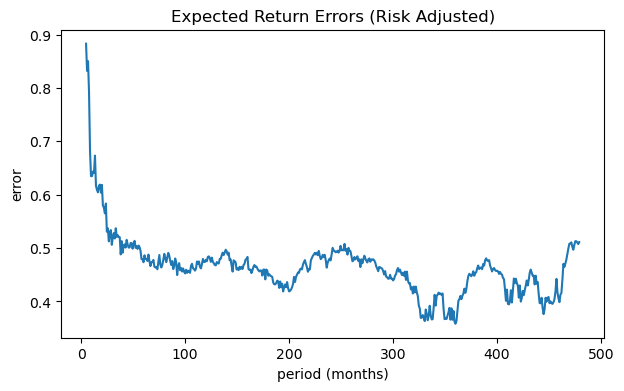

- Min Error: 0.358344641323006
- Min Period: 360.0


In [12]:
# set method for estimatig return properties
method='Robust'
# reallocation time determined above
# used for delta between estimate and actual return
# 6 months in trading days
actDelta = 6*21
# adjust for samp freq (must be int)
actDelta = int(actDelta/sampFreq)

# set a max length based on total possible length (must be int)
pMax = int(0.80*len(returns_samp))
# requiering at least  data points for min
pMin = 5

# get the period range for later use
period = np.arange(pMin,pMax,1)
# for readability change to months
period = period*sampFreq/month2days


# get the errors
error = apa.calc_period_error(returns_samp,pMin,pMax,actDelta,scale='Disp',method=method)

# Plot the data 
plt.figure(figsize=(7, 4))
plt.plot(period, error)
plt.xlabel('period (months)')
plt.ylabel('error')
plt.title('Expected Return Errors (Risk Adjusted)')
plt.show()

# find and print minimum
minInd = np.argmin(error)
print('- Min Error: '+str(error[minInd]))
print('- Min Period: '+str(period[minInd]))





This shows that using:
(a) relative monthly (21 trading days) returns,
(b) a sampling interval of 20 trading days,
(c) a sample period of 360 months,
(d) a robust method for return parameter estimates and
(e) a reallcation target of 6 months,
we could typically expect a future return to 
be at a minumum (and well below) relative to the estimated dispersion.
We found this to be a sufficent result.

We note that 360 months, or 30 years, is a significantly 
long time frame.
Most assets, even large cap US sotcks, will not have 
this extent of historical data avalible.
However this is not a signficant issue as the 
risk adjusted error is low for most of the periods investigated.
For example, we see another local minimum around 200 months, 
which is in-line with the results from the more data limited 
S&P 500 ETF investigated in Project 202410. 
We also observe a steep decline in the first 50 months
that then quickly approches an aproximate asymtope.

Given the results here and those from Project 202410, 
we have made the following suggestions for similar (large cap equity) assets and period selection:
* 30 years if possible;
* if not, then 20 years if possible;
* if not, then use the maximum avalible and issue a yellow flag to the user; and
* issue a red flag if less than 4 years.

Of course, if there is sufficent data (30+ years) it is best to 
repeate this analysis on individual assets to get a custom period selection.
Given the need for excess data compared to periods selected, 
it is not recomended to try this analysis for assets less than 20 years old.




## V. Historical Returns
A simple analysis was done regarding the average portfolio return 
depending on portfolio hold time.
We suggest that the longer a portfolio is held, the higher the return.
We looked at relative returns in one month increments from zero to about 
two thirds of the maximum available time 
(this is due to statistical limitations at longer time frames).

-------------------
-- Full Data Set --
-------------------


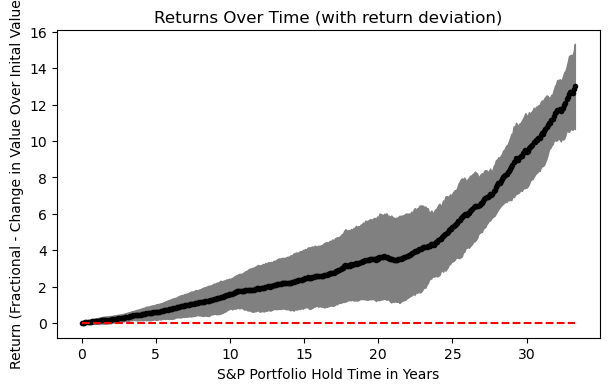

Return: 12.999191158655321 at 33.25396825396825 for an annual of 0.39090646443689037
Return: 2.695338015549582 at 16.666666666666668 for an annual of 0.1617202809329749 +/- 0.10624294554637816
-------------------
--- First Half ----
-------------------


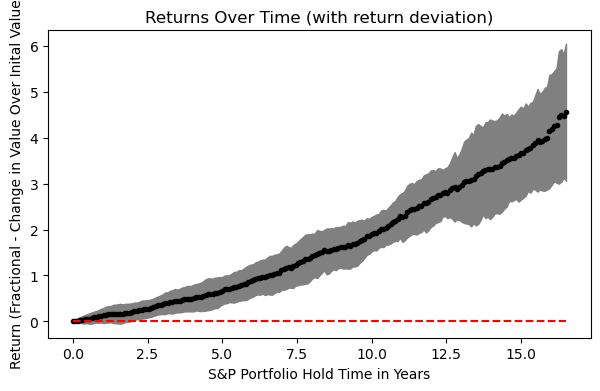

Return: 4.552775767600537 at 16.50793650793651 for an annual of 0.27579314746041717
-------------------
--- Second Half ---
-------------------


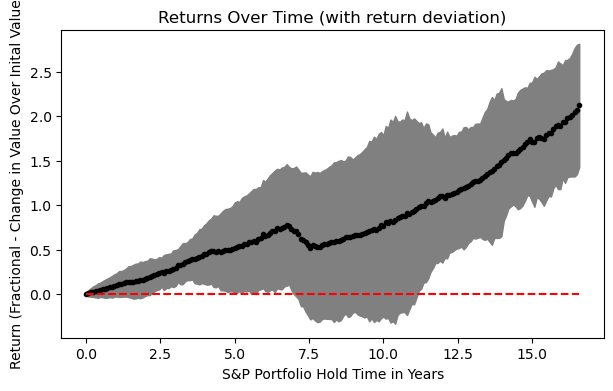

Return: 2.1222947870634705 at 16.587301587301585 for an annual of 0.12794695845454418


In [22]:


print('-------------------')
print('-- Full Data Set --')
print('-------------------')

# calculate history of running returns 
returnHist, returnHistDisp, returnHistTime = apa.calc_running_returns(prices_samp,maxHoldFrac=0.666)

# convert hold time into years
returnHistTime = returnHistTime*sampFreq/month2days/12

plt.figure(figsize=(7, 4))
plt.plot(returnHistTime,returnHist,'.',color='black')
plt.plot(returnHistTime,returnHist*0,'--',color='red')
plt.fill_between(returnHistTime,returnHist+returnHistDisp,returnHist-returnHistDisp,color='gray')
plt.xlabel('S&P Portfolio Hold Time in Years')
plt.ylabel('Return (Fractional - Change in Value Over Inital Value')
plt.title('Returns Over Time (with return deviation)')
plt.show()

print('Return: '+str(returnHist[-1])+' at '+str(returnHistTime[-1])+
      ' for an annual of '+str(returnHist[-1]/returnHistTime[-1]))

# print the value if we held for the maximum calculated time in the
# comparisions below 
n = len(returnHist)
ind = int(n/2)
print('Return: '+str(returnHist[ind])+' at '+str(returnHistTime[ind])+
      ' for an annual of '+str(returnHist[ind]/returnHistTime[ind])+
      ' +/- '+str(returnHistDisp[ind]/returnHistTime[ind]))


print('-------------------')
print('--- First Half ----')
print('-------------------')

n = len(prices_samp)
nMid = int(n/2)

# calculate history of running returns 
returnHist, returnHistDisp, returnHistTime = apa.calc_running_returns(prices_samp[:nMid],maxHoldFrac=0.666)

# convert hold time into years
returnHistTime = returnHistTime*sampFreq/month2days/12

plt.figure(figsize=(7, 4))
plt.plot(returnHistTime,returnHist,'.',color='black')
plt.plot(returnHistTime,returnHist*0,'--',color='red')
plt.fill_between(returnHistTime,returnHist+returnHistDisp,returnHist-returnHistDisp,color='gray')
plt.xlabel('S&P Portfolio Hold Time in Years')
plt.ylabel('Return (Fractional - Change in Value Over Inital Value')
plt.title('Returns Over Time (with return deviation)')
plt.show()

print('Return: '+str(returnHist[-1])+' at '+str(returnHistTime[-1])+
      ' for an annual of '+str(returnHist[-1]/returnHistTime[-1]))


print('-------------------')
print('--- Second Half ---')
print('-------------------')

# calculate history of running returns 
returnHist, returnHistDisp, returnHistTime = apa.calc_running_returns(prices_samp[nMid:],maxHoldFrac=0.666)

# convert hold time into years
returnHistTime = returnHistTime*sampFreq/month2days/12

plt.figure(figsize=(7, 4))
plt.plot(returnHistTime,returnHist,'.',color='black')
plt.plot(returnHistTime,returnHist*0,'--',color='red')
plt.fill_between(returnHistTime,returnHist+returnHistDisp,returnHist-returnHistDisp,color='gray')
plt.xlabel('S&P Portfolio Hold Time in Years')
plt.ylabel('Return (Fractional - Change in Value Over Inital Value')
plt.title('Returns Over Time (with return deviation)')
plt.show()

print('Return: '+str(returnHist[-1])+' at '+str(returnHistTime[-1])+
      ' for an annual of '+str(returnHist[-1]/returnHistTime[-1]))


We found a whopping 1,300% return for an S&P portfolio held for 33 years.
That is a ~40% annual return on average.
However, the full return curve is not linear.
It is better described as two distinct linear regimes.
The annual return is far grater for hold times longer than 20 years.
For hold times less than 20 years (specifically 16.5 years), 
the return is closer to a more reasonable 16% per year on average.
We also noted that a loss was within the expected deviation 
for hold times less than ~2.5 years in all the data subsets explored.

Given our previous obserations about a possible fundemental 
change in market behaviour around 2000 (the middle of our data set),
we decided to look at the first and second hald of the data set seperatly.
For reasonable statistics, the hold time is limited to ~16.5 years.
Suprisingly, we found that earlier time points (ecentally GS act times) showed 
a larger average annual return (28% vs 13%),
a lower deviation and 
a more linear relationship.
We also note that the full data set had a 16% average annual return 
with a deviation of +/- 10 at a comparable 16.6 year hold time.
so the wide deviation nearly contains the subset values.
the second half mostly recapitulates Project 202410
as it covers much of (but not exactly) the same time.

This is further evidence of a fundemental change during the long period examined.
The only insights we are considering would be that for an S&P 500 like portfolio (lage Cap US Stock):
* on average we estimated an expected relative return of ~16% per year if held for ~15 years;
* a wide median deviation spanning 6%-26% depending on when the investment was started;
* higher returns were found if started pre 1990 compared to post 2000; and
* an astonishing 40% annual return on average if held for 30 years - however,
* given the disjointed return curve on the full data and other observations of a possible fundemental change, it is hard to suggest this type of massive return would be seen if a portfolio was held from 2025-2055.

Simply put, a 6-26% annual return on average for a portfolio held for 15 years is a reasonable expectation.
Longer time frames increse the liklyhood of a fundemental change in the market.
A past example shows some change that dramatically reduced mid- to long-term relative returns in the last 25 years.






## IV. Summary
Using this data we make the following suggestions for robust statistical 
parameters describing a large cap US stock asset:
* 21 trading day relative returns;
* sampling frequence, or more properly interval of trading days 20; and
* sampling period of 30 or 20 years if possible (otherwise max and yellow or red flag if less than 20 or 4 years, respectivly).

For portfolios of these assets we also suggest:
* an expectation of 6-26% annual return on average if held for mid- to long-term investment;
* a reallocation based on robust optimization every 6 months or less;
* investors should expect seemingly wilde market swings lasteing between 2-5 months;
* long-term invstors (expecting to hold for 10+ years) should avoid making changes based only on an unexpected change in an assets trend even if that change has presisted for 9 months; but
* all investors should start considering other market factors if an asset is deviating from its expected trend for more than a year. 